In [1]:
from set_4_functions import *

# Set 4 Analysis: Data Access

The tests in Set 4: Data Access consist of imposter subscribers subscribing to legitimate data.

|     **Parameter**    |       **Values**      |
|:--------------------:|:---------------------:|
|      Publishers      |    10, 25, 50, 100    |
|      Subscribers     |    20, 50, 100, 200   |
|      Data Length     |       100 Bytes       |
|     Test Duration    |      900 Seconds      |
|     Latency Count    |          1000         |
|      Reliability     |       `reliable`      |
| Communication Method | `unicast` `multicast` |
|       Transport      |        `UDPv4`        |
|       Test Type      |      `throughput`     |

So what do we want to show? We want to directly compare how the performance of Set 4 (Data Access Attack) differs to that of Set 2 (Normal Usage). We start off by comparing the latencies of the two sets and then we can compare the throughputs.

## Set 2 VS Set 4: Latency Comparison
*Note: Since the 100 participant tests from Set 4 did **not** produce any latency measurements we won't be plotting any data - there is nothing to plot.*

We start off looking at the averages of the latencies.

In [2]:
s2_lat_files = [file for file in get_files('data/set_2') if 'average_latencies' in file and '_4_' not in file]
s4_lat_files = [file for file in get_files('data/set_4') if 'average_latencies' in file and '_4_' not in file]

titles = ['Type', 'Unicast/Multicast', 'Participants', 'Mean Latency (us)', 'Min. Latency (us)', 'Max Latency (us)', 'Std']

if len(s2_lat_files) != len(s4_lat_files):
    print(" The number of files from each set don't match. ", style="black on #de425b")
    print(" Set 2 has %x files and Set 4 has %x files. " %(len(s2_lat_files), len(s4_lat_files)), style="black on #de425b")
else:
    (types, comm_types, participants, means, mins, maxes, stds) = get_table_data(s2_lat_files, s4_lat_files)

    plot_table(titles, [types, comm_types, participants, means, mins, maxes, stds])

We can see that the latencies definitely increase with the number of participants but what we want to compare is the latencies of the normal tests with the latencies of the attack tests.

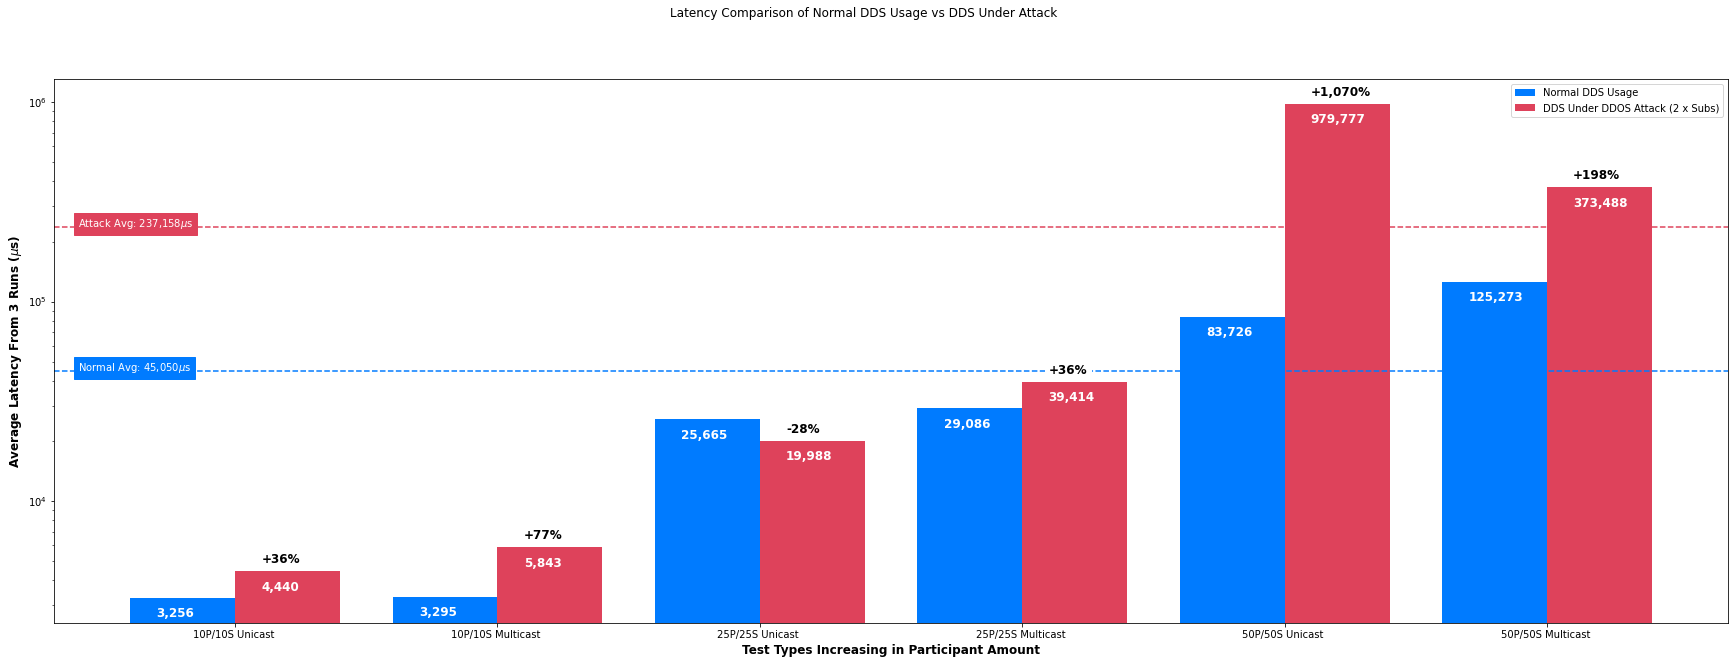

In [62]:
from all_functions import *

fig, ax = plt.subplots(figsize=(30, 10))
fig.suptitle("Latency Comparison of Normal DDS Usage vs DDS Under Attack")

s2_means = {
    'ucast': [],
    'mcast': []
}
s4_means = {
    'ucast': [],
    'mcast': []
}

for file in s2_lat_files:
    if 'unicast' in file:
        s2_means['ucast'].append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))
    else:
        s2_means['mcast'].append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))

for file in s4_lat_files:
    if 'unicast' in file:
        s4_means['ucast'].append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))
    else:
        s4_means['mcast'].append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))

df = pd.DataFrame({
    'normal_ucast_tests': get_test_names([file for file in s2_lat_files if 'unicast' in file]),
    'normal_ucast_means': s2_means['ucast'],
    'normal_mcast_tests': get_test_names([file for file in s2_lat_files if 'multicast' in file]),
    'normal_mcast_means': s2_means['mcast'],
    'attack_ucast_tests': get_test_names([file for file in s4_lat_files if 'unicast' in file]), 
    'attack_ucast_means': s4_means['ucast'],
    'attack_mcast_tests': get_test_names([file for file in s4_lat_files if 'multicast' in file]),
    'attack_mcast_means': s4_means['mcast']
})

width = 0.4
ucast_normal_bars = ax.bar((df.index * 2) - width / 2, df['normal_ucast_means'], width, color='#007bff', label="Normal DDS Usage")
ucast_attack_bars = ax.bar((df.index * 2) + width / 2, df['attack_ucast_means'], width, color='#de425b', label="DDS Under DDOS Attack (2 x Subs)")

mcast_normal_bars = ax.bar(( (df.index * 2) +1 ) - width / 2, df['normal_mcast_means'], width, color='#007bff')
mcast_attack_bars = ax.bar(( (df.index * 2) +1 ) + width / 2, df['attack_mcast_means'], width, color='#de425b')

# Put all the x labels in an ordered and sequential fashion for easy labelling
x_labels = ['', '', '', '', '', '']
for item in df['normal_ucast_tests']:
    i = df['normal_ucast_tests'].index[df['normal_ucast_tests'] == item].tolist()[0]
    x_labels[i * 2] = item
for item in df['normal_mcast_tests']:
    i = df['normal_mcast_tests'].index[df['normal_mcast_tests'] == item].tolist()[0]
    x_labels[i * 2 + 1] = item

normal_means = [0, 0, 0, 0, 0, 0]
attack_means = [0, 0, 0, 0, 0, 0]

for item in df['normal_ucast_means']:
    tdf = df['normal_ucast_means']
    i = tdf.index[tdf == item].tolist()[0]
    normal_means[i * 2] = item
for item in df['normal_mcast_means']:
    tdf = df['normal_mcast_means']
    i = tdf.index[tdf == item].tolist()[0]
    normal_means[i * 2 + 1] = item

for item in df['attack_ucast_means']:
    tdf = df['attack_ucast_means']
    i = tdf.index[tdf == item].tolist()[0]
    attack_means[i * 2] = item
for item in df['attack_mcast_means']:
    tdf = df['attack_mcast_means']
    i = tdf.index[tdf == item].tolist()[0]
    attack_means[i * 2 + 1] = item

perc_diffs = []
for item in normal_means:
    i = normal_means.index(item)
    before = normal_means[i]
    after = attack_means[i]
    if after > before:
        perc_diff = (abs(after - before) / before) * 100
        perc_diff = "+" + format_number(perc_diff)
    elif after < before:
        perc_diff = (abs(before - after) / after) * 100
        perc_diff = "-" + format_number(perc_diff)
    perc_diffs.append(perc_diff + "%")

for mean in normal_means:
    i = normal_means.index(mean)
    if i % 2 == 0:
        normal_ucast = normal_means[i]
        attack_ucast = attack_means[i]
        ax.text(i - width * 0.75, normal_ucast * 0.8, format_number(normal_ucast), color='white', fontweight='bold', fontsize=12)
        ax.text(i + width * 0.25, attack_ucast * 0.8, format_number(attack_ucast), color='white', fontweight='bold', fontsize=12)
    else:
        normal_mcast = normal_means[i]
        attack_mcast = attack_means[i]
        ax.text(i - width * 0.75, normal_mcast * 0.8, format_number(normal_mcast), color='white', fontweight='bold', fontsize=12)
        ax.text(i + width * 0.25, attack_mcast * 0.8, format_number(attack_mcast), color='white', fontweight='bold', fontsize=12)

# Plot mean lines
normal_mean = sum(normal_means) / len(normal_means)
attack_mean = sum(attack_means) / len(attack_means)
ax.axhline(normal_mean, 0, 1, color='#007bff', ls="--")
ax.text(-0.2-width, normal_mean, 'Normal Avg: %s$\mu$s' %format_number(normal_mean), color='white', backgroundcolor='#007bff')
ax.axhline(attack_mean, 0, 1, color='#de425b', ls="--")
ax.text(-0.2-width, attack_mean, 'Attack Avg: %s$\mu$s' %format_number(attack_mean), color='white', backgroundcolor='#de425b')

# Plot percentage differences
for i in range(0, len(perc_diffs)):
    x = i + width / 4
    y = attack_means[i] * 1.1
    s = perc_diffs[i]
    ax.text(x, y, s, fontweight='bold', fontsize=12, backgroundcolor='white')

# Label the x-axis accordingly
x_labels = [label.replace("(100B)", "") for label in x_labels]
ax.set_xticks(np.arange(len(df['normal_ucast_tests']) * 2), x_labels)

ax.set_ylabel("Average Latency From 3 Runs ($\mu$s)", fontweight='bold', fontsize=12)
ax.set_xlabel("Test Types Increasing in Participant Amount", fontweight='bold', fontsize=12)
ax.set_yscale('log')
_ = ax.legend()

In [4]:
# ax.scatter(s2_df['means'].index, s2_df['means'], 100, c='#488f31')
# ax.scatter(s4_df['means'].index, s4_df['means'], 100, c='#de425b')

# ax.plot(s2_df['means'], c='#488f31', label="Normal")
# ax.plot(s4_df['means'], c='#de425b', label="Attack")

# for i in range(0, len(s2_df.index)):
#     test = get_participants(s2_ucast_files[i]) + " " + get_test_comm(s2_ucast_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s2_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#488f31')
# for i in range(0, len(s4_df.index)):
#     test = get_participants(s4_ucast_files[i]) + " " + get_test_comm(s4_ucast_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s4_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#de425b')

# config_ax(ax, True, 'Latency (us)', 'Test', False, False, True, True)

# plt.tight_layout(pad=2)

# fig, ax = plt.subplots(figsize=(30, 10))
# fig.suptitle("Latency Comparison of Normal DDS vs DDS Under Attack (Multicast)")

# s2_means = []
# s4_means = []

# s2_mcast_files = [file for file in s2_lat_files if 'multicast' in file]
# s4_mcast_files = [file for file in s4_lat_files if 'multicast' in file]

# for file in s2_mcast_files:
#     s2_means.append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))
# for file in s4_mcast_files:
#     s4_means.append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))

# s2_df = pd.DataFrame({'tests': s2_mcast_files, 'means': s2_means})
# s4_df = pd.DataFrame({'tests': s4_mcast_files, 'means': s4_means})

# ax.scatter(s2_df['means'].index, s2_df['means'], 100, c='#488f31')
# ax.scatter(s4_df['means'].index, s4_df['means'], 100, c='#de425b')

# ax.plot(s2_df['means'], c='#488f31', label="Normal")
# ax.plot(s4_df['means'], c='#de425b', label="Attack")

# for i in range(0, len(s2_df.index)):
#     test = get_participants(s2_mcast_files[i]) + " " + get_test_comm(s2_mcast_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s2_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#488f31')
# for i in range(0, len(s4_df.index)):
#     test = get_participants(s4_mcast_files[i]) + " " + get_test_comm(s4_mcast_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s4_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#de425b')

# config_ax(ax, True, 'Latency (us)', 'Test', False, False, True, True)

# plt.tight_layout(pad=2)

# fig, ax = plt.subplots(figsize=(30, 10))
# fig.suptitle("Latency Comparison of Normal DDS vs DDS Under Attack (Combined)")

# s2_means = []
# s4_means = []

# for file in s2_lat_files:
#     s2_means.append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))
# for file in s4_lat_files:
#     s4_means.append(get_stat(pd.read_csv(file)['avg_non_mal_run_latency'], 'mean', False))

# s2_df = pd.DataFrame({'tests': s2_lat_files, 'means': s2_means})
# s4_df = pd.DataFrame({'tests': s4_lat_files, 'means': s4_means})

# ax.scatter(s2_df['means'].index, s2_df['means'], 100, c='#488f31')
# ax.scatter(s4_df['means'].index, s4_df['means'], 100, c='#de425b')

# ax.plot(s2_df['means'], c='#488f31', label="Normal")
# ax.plot(s4_df['means'], c='#de425b', label="Attack")

# for i in range(0, len(s2_df.index)):
#     test = get_participants(s2_lat_files[i]) + " " + get_test_comm(s2_lat_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s2_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#488f31')
# for i in range(0, len(s4_df.index)):
#     test = get_participants(s4_lat_files[i]) + " " + get_test_comm(s4_lat_files[i])
#     test = test.title()
#     ax.text(i + 0.06, s4_df['means'][i] * 0.997, test, c='#fff', backgroundcolor='#de425b')

# config_ax(ax, True, 'Latency (us)', 'Test', False, False, True, True)

# plt.tight_layout(pad=2)